In [173]:
import pandas as pd

kc_houses = pd.read_csv('/Users/flatironschool/Documents/dsc-v2-mod1-final-project-houston-ds-060319/kc_house_data.csv')

In [104]:
kc_houses.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [105]:
kc_houses['waterfront'].unique()

array([nan,  0.,  1.])

In [106]:
kc_houses['condition'].unique()

array([3, 5, 4, 1, 2])

In [107]:
kc_houses['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [108]:
kc_houses['view'].nunique()

5

In [109]:
kc_houses['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [48]:
kc_houses['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Given that the vast majority of lots have a value of 0 for 'yr_renovated' and >10% of the values for 'yr_renovated' are missing, we will replace 'yr_renovated' with a dummy variable 'was_renovated'; all lots that have a year in which they were renovated will be represented with a 1, and all other lots will be represented with 0.

In [174]:
kc_houses['was_renovated']= kc_houses['yr_renovated'].fillna(0)
temp = kc_houses['was_renovated'].astype(bool).astype(int)
kc_houses['was_renovated'] = temp
kc_houses.drop(columns = ['yr_renovated'],inplace =True)

Roughly 10% of records have a null value for 'waterfront'. Given that a large number of records have a null value for waterfront but we think this information may have a bearing on sale price, it would not be practical to simply drop the rows for which waterfront has a null value. Instead, null values in the waterfront column will be replaced with 0.

In [175]:
kc_houses['waterfront'].fillna(0,inplace=True)

Given that only 63 rows are missing values for 'view', we will simply drop the rows that have a null value for 'view'

In [176]:
no_view = kc_houses['view'].isna()
# no_view.head()
kc_houses.drop(kc_houses[no_view].index,inplace=True)

In [177]:
kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
was_renovated    21534 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.6+ MB


'sqft_basement' is a string for some reason? Let's convert that to float.

In [178]:
no_basement = kc_houses['sqft_basement']=='?'
kc_houses = kc_houses.drop(kc_houses[no_basement].index)

In [179]:
kc_houses['sqft_basement'] = kc_houses['sqft_basement'].apply(lambda x: float(x))

In [68]:
kc_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,...,21082.000000,21082.000000,21082.000000,17340.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,...,1789.000000,291.359975,1971.023337,83.111419,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,0.034247
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,...,828.369355,442.007858,29.323120,398.756281,53.528769,0.138568,0.140607,685.544250,27148.781580,0.181868
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,0.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


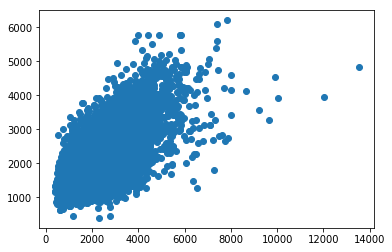

In [132]:
import matplotlib.pyplot as plt
plt.scatter(kc_houses['sqft_living'],kc_houses['sqft_living15'])
plt.show()

In [37]:
kc_houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,living-lot-ratio,living-lot-ratio15
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.004259,0.011592,-0.023944,...,0.021609,-0.011802,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.010481,0.088188,0.099755
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,...,0.054273,0.129887,-0.053620,0.307868,0.022417,0.585304,0.083189,0.117668,0.123050,0.065531
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,...,0.155462,0.018419,-0.153990,-0.010415,0.132318,0.392874,0.030952,0.017531,0.026503,-0.060570
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,...,0.507565,0.050786,-0.204435,0.024487,0.225025,0.569139,0.088854,0.046519,0.286945,0.186403
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,...,0.318217,0.055471,-0.199839,0.052383,0.241856,0.756208,0.184801,0.050640,0.076427,-0.032489
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,...,0.052646,0.004661,-0.129846,-0.085143,0.230137,0.145142,0.717095,0.005203,-0.252470,-0.252465
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,...,0.489410,0.002978,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.003236,0.557130,0.494861
waterfront,-0.004259,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,...,-0.025000,0.081909,0.029490,-0.012282,-0.037845,0.082352,0.030605,0.074657,-0.029894,-0.042551
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,...,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332,0.090465,-0.002310,-0.013922
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,...,-0.361398,-0.061764,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,-0.055304,-0.157109,-0.175018


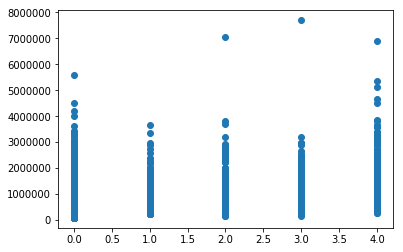

In [69]:
plt.scatter(kc_houses['view'],kc_houses['price'])

In [22]:
kc_houses['zipcode'].nunique()

70

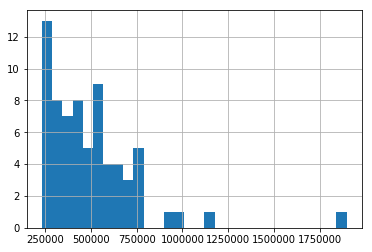

In [32]:
kc_houses.groupby('zipcode')['price'].median().hist(bins = 30)

In [ ]:
plt.hist(kc_houses['sqft_living15'])

(array([3.000e+00, 5.000e+00, 1.290e+02, 1.353e+03, 5.251e+03, 6.531e+03,
        4.811e+03, 2.385e+03, 5.590e+02, 5.500e+01]),
 array([5.98896142, 6.26345689, 6.53795237, 6.81244784, 7.08694332,
        7.3614388 , 7.63593427, 7.91042975, 8.18492522, 8.4594207 ,
        8.73391617]),
 <a list of 10 Patch objects>)

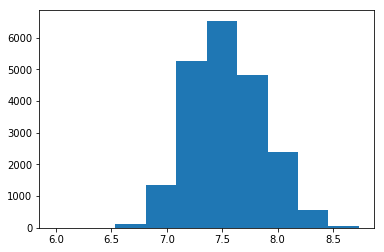

In [180]:
import numpy as np
plt.hist(np.log(kc_houses['sqft_living15']))

In [134]:
kc_houses['log_sqft_liv'] = np.log(kc_houses['sqft_living15'])

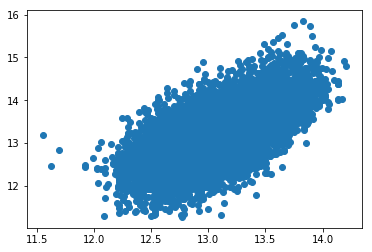

In [135]:
from sklearn.linear_model import LinearRegression as LinReg
house_model = LinReg()
to_model = kc_houses[['condition','log_sqft_liv']]
mod = house_model.fit(to_model,np.log(kc_houses['price']))
y_pred = mod.predict(to_model)
plt.scatter(y_pred,np.log(kc_houses['price']))

In [136]:
from sklearn.metrics import explained_variance_score
explained_variance_score(kc_houses['price'],np.e**y_pred)

0.3359501108224201

In [ ]:
#ask Bryan how to encode 70 categories

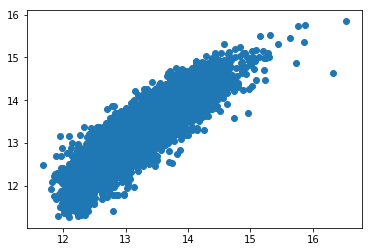

In [100]:
everything = kc_houses.drop(columns = ['id','date','price','yr_renovated','living-lot-ratio','living-lot-ratio15'])
mod = house_model.fit(everything,np.log(kc_houses['price']))
y_pred = mod.predict(everything)
plt.scatter(y_pred,np.log(kc_houses['price']))

In [101]:
explained_variance_score(kc_houses['price'],np.e**y_pred)

0.6990673731935952

In [120]:
model_features = kc_houses[['bedrooms','bathrooms','floors','waterfront','condition','grade','sqft_above','sqft_basement','yr_built','was_renovated','log_sqft_liv']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e308f28>,
      dtype=object)

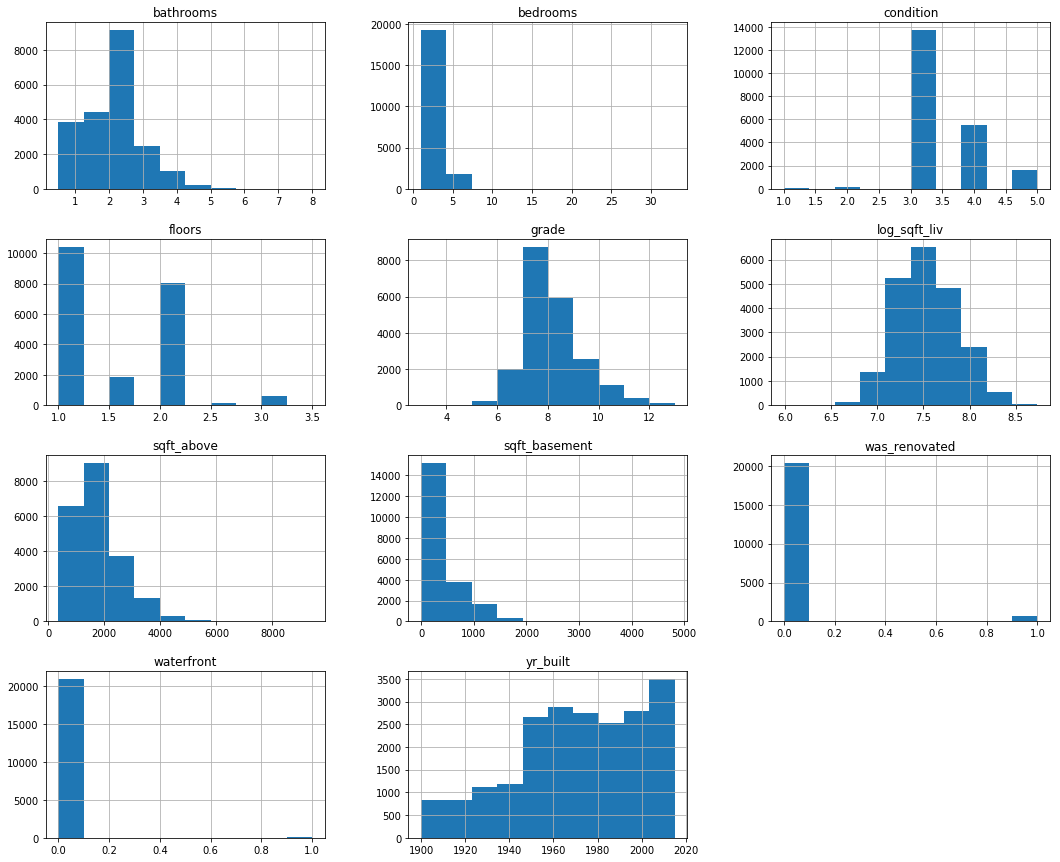

In [122]:
model_features.hist(figsize = (18,15))

(array([1.9100e+02, 2.6850e+03, 0.0000e+00, 1.6331e+04, 1.5550e+03,
        3.0900e+02, 1.0000e+01, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.34965076, 0.69930151, 1.04895227, 1.39860302,
        1.74825378, 2.09790454, 2.44755529, 2.79720605, 3.14685681,
        3.49650756]),
 <a list of 10 Patch objects>)

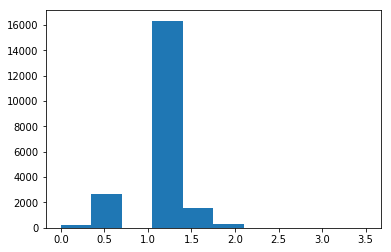

In [124]:
plt.hist(np.log(kc_houses['bedrooms']))

In [ ]:
mod = house_model.fit(model_features,np.log(kc_houses['price']))
y_pred = mod.predict(everything)
plt.scatter(y_pred,np.log(kc_houses['price']))

In [ ]:
from sklearn.feature_selection import RFE


In [192]:
zips = pd.get_dummies(kc_houses['zipcode'])

In [193]:
houses_with_zips = pd.concat([kc_houses,zips],axis =1)

In [194]:
houses_with_zips.drop(columns = ['zipcode'],inplace=True)

In [148]:
from sklearn.model_selection import train_test_split

In [199]:
everything = houses_with_zips.drop(columns = ['id','date','price','sqft_lot','sqft_lot15','sqft_living15'])
target = houses_with_zips['price']

In [200]:
everything_train, everything_test, target_train, target_test = train_test_split(everything,target,test_size=.2)

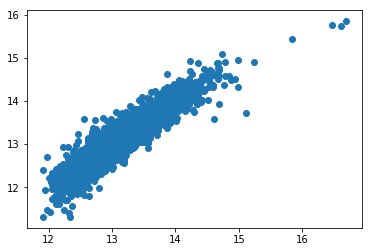

In [203]:
mod = house_model.fit(everything_train,np.log(target_train))
y_pred = mod.predict(everything_test)
plt.scatter(y_pred,np.log(target_test))

In [206]:
explained_variance_score(np.log(target_test),y_pred)#is this logic correct?

0.8748506909240397

(array([1.631e+03, 6.216e+03, 5.359e+03, 3.395e+03, 1.987e+03, 9.980e+02,
        4.000e+02, 3.080e+02, 2.130e+02, 1.560e+02, 1.070e+02, 7.800e+01,
        4.700e+01, 2.900e+01, 3.300e+01, 3.200e+01, 1.600e+01, 1.200e+01,
        1.500e+01, 1.400e+01, 6.000e+00, 9.000e+00, 1.000e+00, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  78000.,  230440.,  382880.,  535320.,  687760.,  840200.,
         992640., 1145080., 1297520., 1449960., 1602400., 1754840.,
        1907280., 2059720., 2212160., 2364600., 2517040., 2669480.,
        2821920., 2974360., 3126800., 3279240., 3431680., 3584120.,
        3736560., 3889000., 4041440., 4193880., 4346320., 4498760.,
        4651200., 4803640., 4956080.

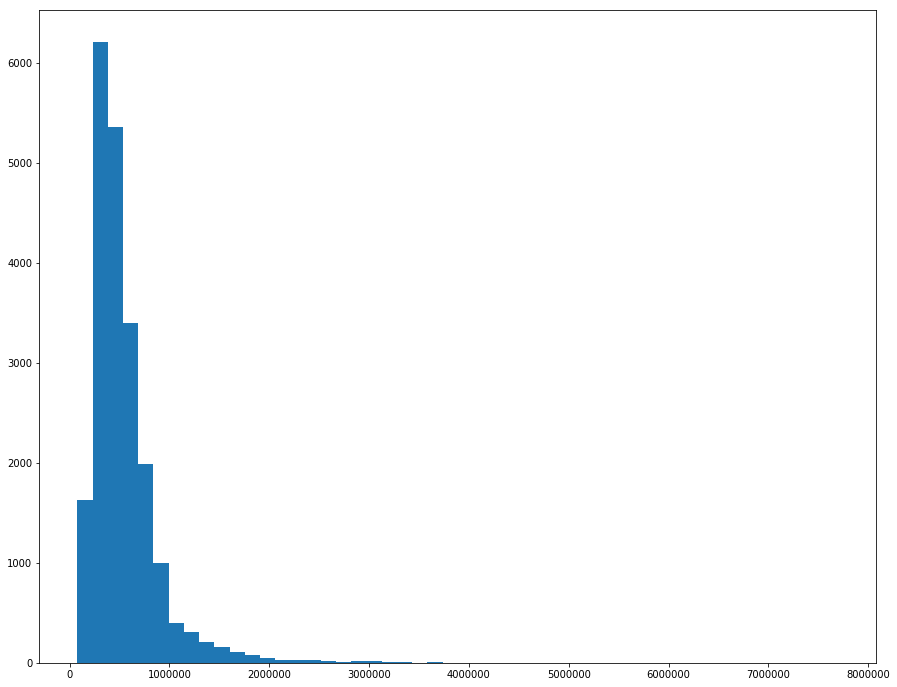

In [157]:
plt.figure(figsize = (15,12))
plt.hist(kc_houses['price'],bins = 50)

In [158]:
kc_houses['price'].describe()

count    2.108200e+04
mean     5.402469e+05
std      3.667323e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [162]:
kc_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,log_sqft_liv
count,1.962800e+04,19628.000000,19628.000000,19628.000000,19628.000000,1.962800e+04,19628.000000,19628.000000,19628.000000,19628.000000,...,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000,19628.000000
mean,4.610491e+09,467120.692123,3.320868,2.038809,1954.495669,1.451994e+04,1.470476,0.002445,0.160434,3.404830,...,1692.239963,262.255706,1970.768035,98078.500153,47.556091,-122.213125,1907.807622,12347.386489,0.029702,7.506713
std,2.877933e+09,195606.490612,0.905342,0.701514,754.764260,4.015123e+04,0.535971,0.049393,0.615843,0.645391,...,711.380034,403.439192,29.059370,53.318121,0.141758,0.142369,600.334061,26252.383945,0.169770,0.305316
min,1.000102e+06,78000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,5.988961
25%,2.140938e+09,314000.000000,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,...,1170.000000,0.000000,1952.000000,98033.000000,47.457600,-122.330000,1460.000000,5041.500000,0.000000,7.286192
50%,3.910050e+09,433000.000000,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,...,1500.000000,0.000000,1974.000000,98065.000000,47.565900,-122.232000,1790.000000,7541.500000,0.000000,7.489971
75%,7.340601e+09,590075.000000,4.000000,2.500000,2410.000000,1.025550e+04,2.000000,0.000000,0.000000,4.000000,...,2080.000000,500.000000,1996.000000,98118.000000,47.680200,-122.122000,2260.000000,9840.000000,0.000000,7.723120
max,9.900000e+09,999999.000000,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,5710.000000,2720.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000,1.000000,8.507143


(array([ 22.,  29.,  52.,  87., 172., 206., 374., 519., 540., 793., 829.,
        639., 818., 864., 775., 724., 740., 678., 764., 720., 750., 539.,
        650., 447., 529., 605., 502., 389., 438., 401., 287., 393., 317.,
        286., 264., 275., 284., 201., 207., 236., 168., 194., 148., 122.,
        145., 130.,  83., 112.,  99.,  82.]),
 array([ 78000.  ,  96439.98, 114879.96, 133319.94, 151759.92, 170199.9 ,
        188639.88, 207079.86, 225519.84, 243959.82, 262399.8 , 280839.78,
        299279.76, 317719.74, 336159.72, 354599.7 , 373039.68, 391479.66,
        409919.64, 428359.62, 446799.6 , 465239.58, 483679.56, 502119.54,
        520559.52, 538999.5 , 557439.48, 575879.46, 594319.44, 612759.42,
        631199.4 , 649639.38, 668079.36, 686519.34, 704959.32, 723399.3 ,
        741839.28, 760279.26, 778719.24, 797159.22, 815599.2 , 834039.18,
        852479.16, 870919.14, 889359.12, 907799.1 , 926239.08, 944679.06,
        963119.04, 981559.02, 999999.  ]),
 <a list of 50 Patch ob

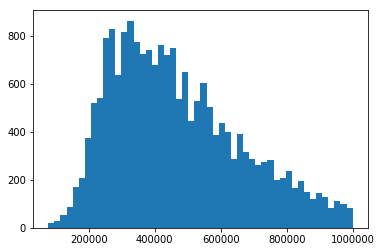

In [163]:
plt.hist(kc_houses['price'],bins =50)

In [164]:
everything = houses_with_zips.drop(columns = ['id','date','price','sqft_lot','sqft_lot15','sqft_living15','bathrooms'])
target = houses_with_zips['price']
everything_train, everything_test, target_train, target_test = train_test_split(everything,target,test_size=.2)

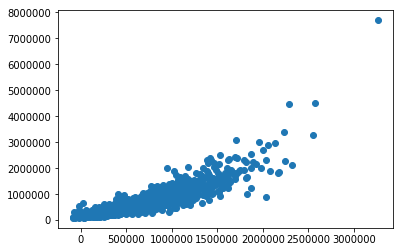

In [165]:
mod = house_model.fit(everything_train,target_train)
y_pred = mod.predict(everything_test)
plt.scatter(y_pred,target_test)

In [166]:
explained_variance_score(target_test,y_pred)

0.7869024501856363

(array([105.,  24.,  43.,  42.,  55.,  78., 138.,  81., 120.,  66.,  69.,
         49.,  48., 130.,  51., 110.,  81.,  94.,  68.,  85., 199., 142.,
        157., 100., 109., 109., 128.,  36.,  22.,  19.,  21.,  35.,  54.,
        137., 141., 143., 211., 162., 138.,  91., 364., 223., 179., 227.,
        207., 203., 494., 256., 186., 187., 209., 315., 237., 505., 234.,
        156., 173., 232., 330., 358., 381.,  97., 136., 138., 153., 177.,
        626., 371., 329., 222., 187.,  94., 196., 419., 205., 269., 236.,
        253., 285., 198., 372., 239., 144., 166., 159., 212., 410., 256.,
        195., 386., 389., 399., 387., 671., 214., 135., 121., 156., 172.,
        507.]),
 array([1900.  , 1901.15, 1902.3 , 1903.45, 1904.6 , 1905.75, 1906.9 ,
        1908.05, 1909.2 , 1910.35, 1911.5 , 1912.65, 1913.8 , 1914.95,
        1916.1 , 1917.25, 1918.4 , 1919.55, 1920.7 , 1921.85, 1923.  ,
        1924.15, 1925.3 , 1926.45, 1927.6 , 1928.75, 1929.9 , 1931.05,
        1932.2 , 1933.35, 1934.5 ,

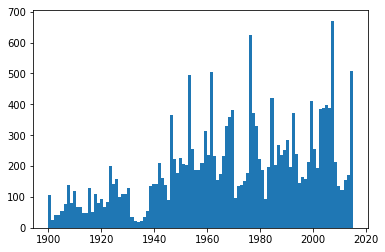

In [169]:
plt.hist(kc_houses['yr_built'], bins =100)

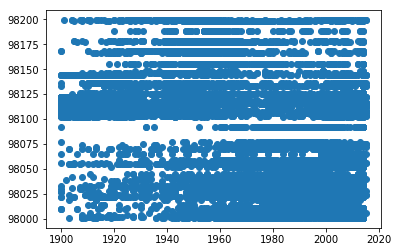

In [181]:
plt.scatter(kc_houses['yr_built'],kc_houses['zipcode'])

In [182]:
kc_houses['yr_built'].nunique()

116

In [183]:
kc_houses.groupby(['zipcode','yr_built'])['price'].median()

zipcode  yr_built
98001    1903         230000.0
         1908         213750.0
         1909         185900.0
         1912         170000.0
         1913         168000.0
         1919         189950.0
         1936         292500.0
         1938         389000.0
         1939         249900.0
         1942         239950.0
         1943         311000.0
         1944         199900.0
         1946         207725.0
         1947         225000.0
         1948         366250.0
         1950         243450.0
         1952         231500.0
         1953         209550.0
         1954         228725.0
         1955         314564.5
         1956         100000.0
         1958         210500.0
         1959         341500.0
         1960         246700.0
         1961         294000.0
         1962         223500.0
         1963         217500.0
         1964         235000.0
         1965         274000.0
         1966         215000.0
                       ...    
98199    1968        

(array([2.8760e+03, 1.6331e+04, 1.5550e+03, 2.9600e+02, 1.3000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. ]),
 <a list of 20 Patch objects>)

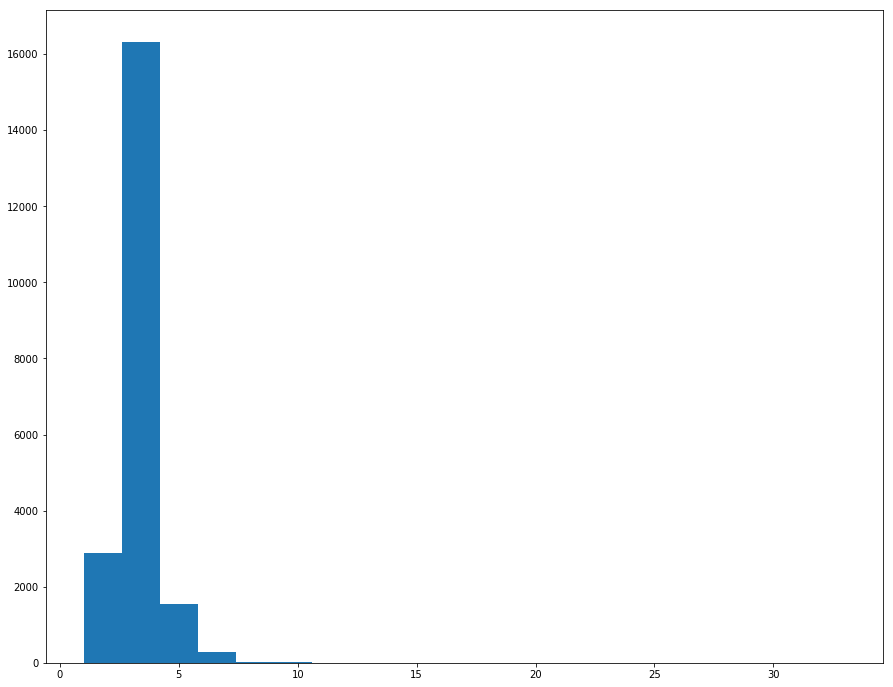

In [186]:
plt.figure(figsize = (15,12))
plt.hist(kc_houses['bedrooms'],bins = 20)

In [187]:
kc_houses['bedrooms'].describe()

count    21082.000000
mean         3.372403
std          0.924996
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [188]:
too_many_bedrooms = kc_houses[kc_houses['bedrooms']>10]

In [189]:
kc_houses = kc_houses.drop(too_many_bedrooms.index)

In [190]:
kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21080 entries, 0 to 21596
Data columns (total 21 columns):
id               21080 non-null int64
date             21080 non-null object
price            21080 non-null float64
bedrooms         21080 non-null int64
bathrooms        21080 non-null float64
sqft_living      21080 non-null int64
sqft_lot         21080 non-null int64
floors           21080 non-null float64
waterfront       21080 non-null float64
view             21080 non-null float64
condition        21080 non-null int64
grade            21080 non-null int64
sqft_above       21080 non-null int64
sqft_basement    21080 non-null float64
yr_built         21080 non-null int64
zipcode          21080 non-null int64
lat              21080 non-null float64
long             21080 non-null float64
sqft_living15    21080 non-null int64
sqft_lot15       21080 non-null int64
was_renovated    21080 non-null int64
dtypes: float64(8), int64(12), object(1)
memory usage: 3.5+ MB


(array([1.910e+02, 2.685e+03, 9.607e+03, 6.724e+03, 1.555e+03, 2.600e+02,
        3.600e+01, 1.300e+01, 6.000e+00, 3.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

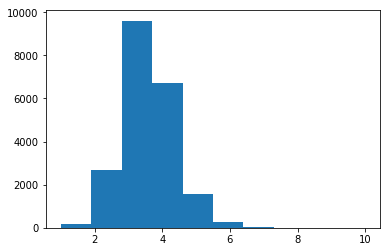

In [191]:
plt.hist(kc_houses['bedrooms'])

In [209]:
year_built = pd.get_dummies(houses_with_zips['yr_built'])
houses_with_zips_and_years = pd.concat([houses_with_zips,year_built],axis=1)
houses_with_zips_and_years.drop(columns = ['yr_built'],inplace=True)

In [210]:
everything = houses_with_zips_and_years.drop(columns = ['id','date','price','sqft_lot','sqft_lot15','sqft_living15','bathrooms'])
target = houses_with_zips['price']
everything_train, everything_test, target_train, target_test = train_test_split(everything,target,test_size=.2)

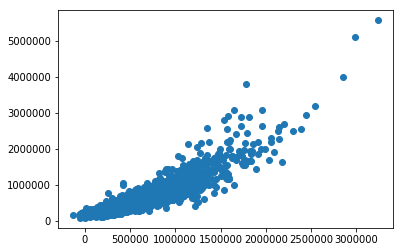

In [211]:
mod = house_model.fit(everything_train,target_train)
y_pred = mod.predict(everything_test)
plt.scatter(y_pred,target_test)

In [212]:
explained_variance_score(target_test,y_pred)

0.8171939789098877

In [ ]:
#grouping by year built does not improve model

In [213]:
def extract_year_mon_day(df):
    df['Year'], df['Month'], df['Day'] = df['date'].dt.year, df['date'].dt.month, df['date'].dt.day
    return df

In [214]:
houses_with_zips['date'] = pd.to_datetime(houses_with_zips['date'])

In [215]:
houses_with_dates = extract_year_mon_day(houses_with_zips)

In [224]:
year_sold = pd.get_dummies(houses_with_dates['Year'])
houses_with_years_and_zips = pd.concat([houses_with_zips,year_sold],axis = 1)

In [225]:
everything = houses_with_years_and_zips.drop(columns = ['id','date','price','sqft_lot','sqft_lot15','sqft_living15','bathrooms'])
target = houses_with_zips['price']
everything_train, everything_test, target_train, target_test = train_test_split(everything,target,test_size=.2)

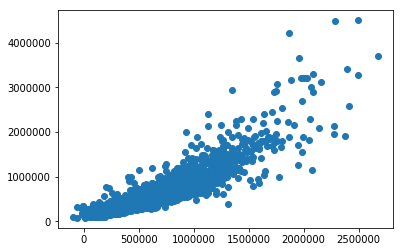

In [226]:
mod = house_model.fit(everything_train,target_train)
y_pred = mod.predict(everything_test)
plt.scatter(y_pred,target_test)

In [227]:
explained_variance_score(target_test,y_pred)

0.7996012031708833

In [ ]:
#grouping by year sold makes the model WORSE